In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
final_df = pd.read_csv(r"C:\Users\Alvaro Millan Ruiz\OneDrive\Escritorio\BDS\Block_5\NLP\Project\Final_df.csv") 
final_df = final_df.drop(columns=["cleaned_speeches_no_postagging_expanded", "cleaned_speeches_no_postagging_no_expanded", 
                                  "cleaned_speeches_postagging_no_expanded", "cleaned_speeches_postagging_expanded"])
final_df

,Session,Year,ISO-Code,Speech,number_sentences,number_tokens,Income Level
0,45,1990,AFG,"﻿Allow me, first of all, Sir, to congratulate ...",159,4982,1
1,45,1990,AGO,"﻿First I would like to congratulate you, Sir, ...",77,2970,2
2,45,1990,ALB,﻿It is a special pleasure for me to speak at t...,112,3783,2
3,45,1990,ARE,"﻿\nMr. President, on behalf of the delegation ...",115,3407,4
4,45,1990,ARG,"﻿At the outset, let me convey to you, Sir, my ...",81,2816,2
...,...,...,...,...,...,...,...
6434,79,2024,WSM,"Excellencies, \nI extend my congratulations t...",68,1572,2
6435,79,2024,YEM,"Your Majesties, Excellencies, and Highnesses, ...",57,1876,1
6436,79,2024,ZAF,President of the 79th Session of the UN Genera...,100,1870,3
6437,79,2024,ZMB,"\n YOUR EXCELLENCY PHILEMON YANG, PRESIDENT O...",81,2348,2


# 1. Compare number of memember and number of speeches

In [6]:
UN_dict = {1990:159, 1991:166, 1992:179, 1993:184, 1994:184, 1995:184, 1996:184, 1997:184, 1998:184, 1999:188, 2000:189,
            2001:189, 2002:191, 2003:191, 2004:191, 2005:191, 2006:192, 2007:192, 2008:192, 2009:192, 2010:192, 2011:193, 
            2012:193, 2013:193, 2014:193, 2015:193, 2016:193, 2017:193, 2018:193, 2019:193, 2020:193, 2021:193, 2022:193, 2023:193, 2024:193}



# 2. Plot of the Token and stuff

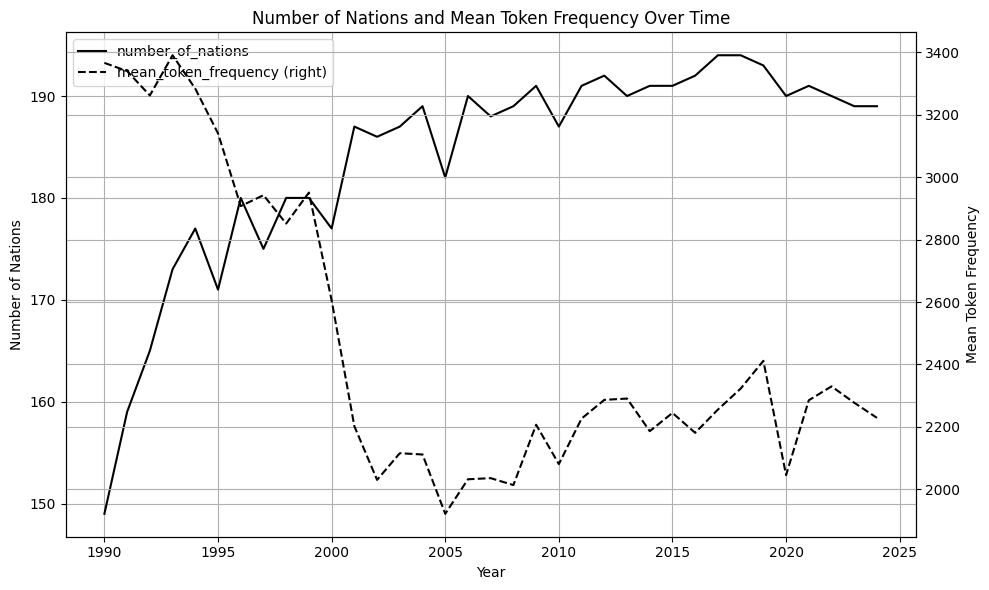

In [27]:
df_summary = final_df.groupby('Year').agg(
    number_of_nations=('ISO-Code', 'nunique'),
    total_tokens=('number_tokens', 'sum')
)

# Calculate mean token frequency
df_summary['mean_token_frequency'] = df_summary['total_tokens'] / df_summary['number_of_nations']

# Create the plot
ax = df_summary.loc[1946:, ['number_of_nations', 'mean_token_frequency']].plot(
    secondary_y='mean_token_frequency',  # Secondary axis for mean_token_frequency
    figsize=(10, 6),
    color=['black', 'black'],  # Both lines in black
    style=['-', '--'],         # Solid line for nations, dashed for token frequency
    title='Number of Nations and Mean Token Frequency Over Time'
)

# Add grid to both axes
ax.grid(True)
ax.right_ax.grid(True)  # Secondary y-axis grid

# Label axes
ax.set_ylabel('Number of Nations')
ax.right_ax.set_ylabel('Mean Token Frequency')


# Adjust layout
plt.tight_layout()
plt.show()